In [1]:
from collections import Counter
import os
import timeit

import numpy as np
from PIL import Image
from scipy import ndimage as ndi

import skimage
from skimage import color
from skimage.morphology import skeletonize
from skimage.filters import threshold_local, threshold_mean, threshold_minimum, threshold_sauvola, threshold_otsu
from skimage.morphology import skeletonize

import rasterio
from rasterio.plot import show, adjust_band

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

from utils.plotting import *
from utils.process import *


# Introduction

The purpose of this Jupyter Notebook is to show how the `TGGLinesPlus` method can be used across different domains.

## Character recognition
### MNIST

In [2]:
mnist_filename = '../data/mnist/mnist_test.csv'
mnist_images, mnist_labels = read_in_mnist(mnist_filename)
mnist_binaries = [create_binary(image) for image in mnist_images]
mnist_skeletons = [create_skeleton(binary) for binary in mnist_binaries]


In [3]:
idx_8 = 3406
label_8 = mnist_labels[idx_8]
img_8 = mnist_images[idx_8]
binary_8 = mnist_binaries[idx_8]
skeleton_8 = mnist_skeletons[idx_8]


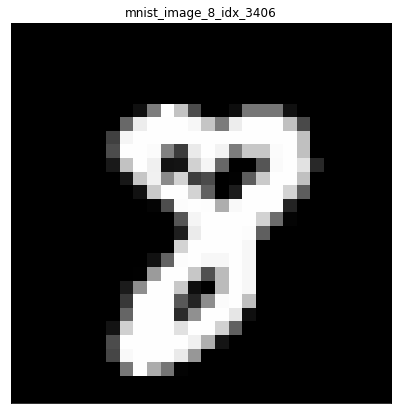

In [4]:
fig, ax = plt.subplots(1, figsize=(7, 7))

ax.imshow(img_8, cmap="gray")

ax.set_xticks([])
ax.set_yticks([]) 
ax.set_title("mnist_image_{}_idx_{}".format(label_8, idx_8))

plt.show()


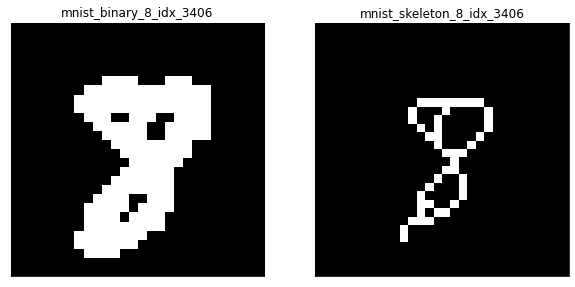

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

ax[0].imshow(binary_8, cmap="gray")
ax[1].imshow(skeleton_8, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
    
ax[0].set_title("mnist_binary_{}_idx_{}".format(label_8, idx_8))
ax[1].set_title("mnist_skeleton_{}_idx_{}".format(label_8, idx_8))

plt.show()


In [6]:
skeleton_array_8, coordinates_8 = create_skeleton_graph(skeleton_8, connectivity=2)
skeleton_graph_8 = nx.from_scipy_sparse_array(skeleton_array_8)
search_by_node_8, search_by_location_8 = get_node_locations(coordinates_8)


In [7]:
result_dict_8 = TGGLinesPlus(skeleton_8)
print_stats(result_dict_8)


Number of junctions:                       7
Number of path segmentation endpoints:     8
Number of nodes in graph:                  45
Path seg endpoints as total node percent:  0.178
------------------------------------------
Number of pixels in image skeleton:        45
Number of pixels in image:                 900
Skeleton pixels as total image percent:    0.05
------------------------------------------
Time to run:                               0.01092s



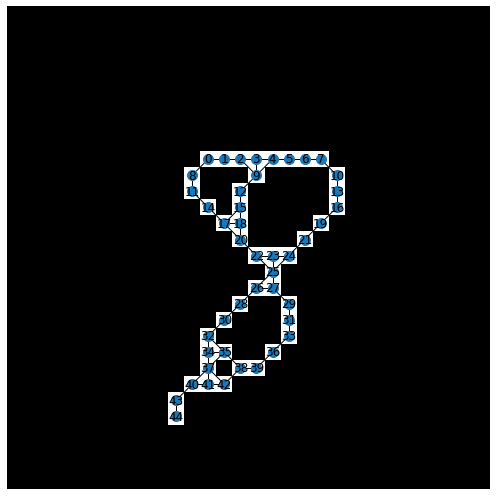

In [9]:
plot_graph(skeleton_8, skeleton_graph_8, coordinates_8, search_by_node_8)


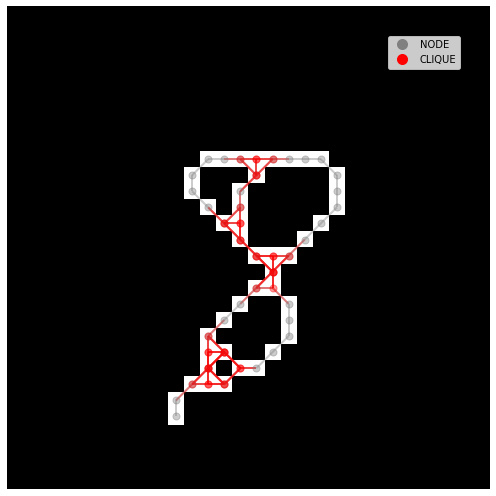

In [10]:
plot_cliques(result_dict_8, "", node_size=50, node_labels=False)


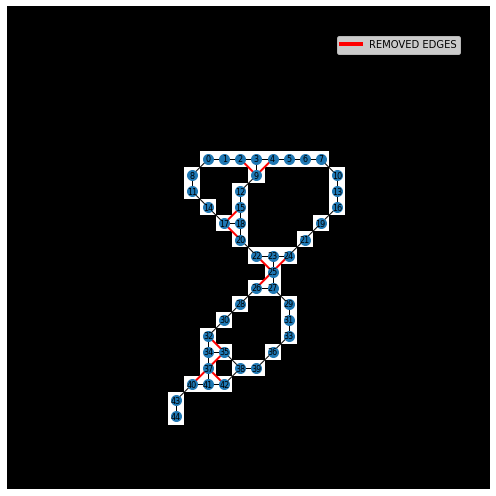

In [11]:
plot_removed_edges(result_dict_8, "")


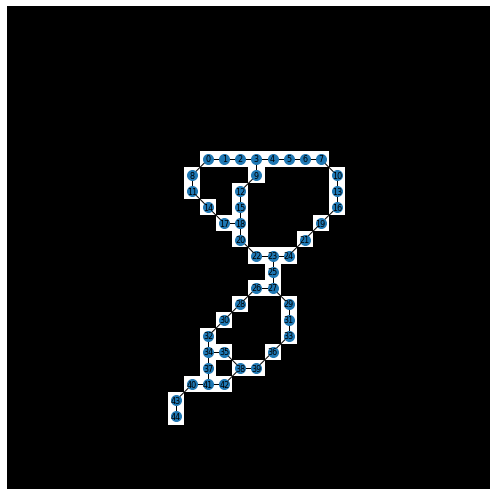

In [12]:
plot_simplified_graph(result_dict_8, "")


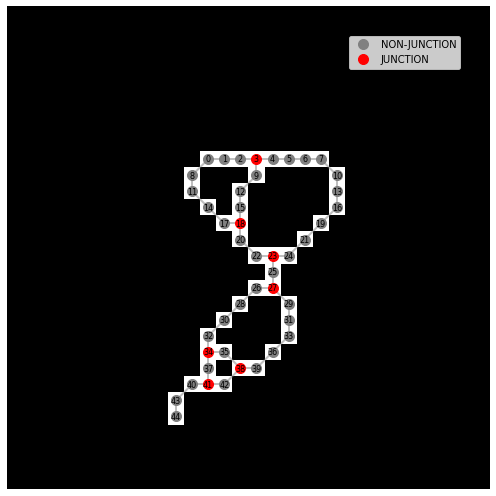

In [13]:
plot_junctions(result_dict_8, "")


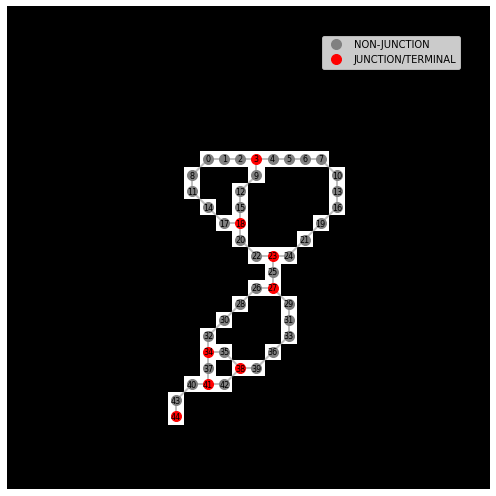

In [14]:
plot_pathseg_endpoints(result_dict_8, "")


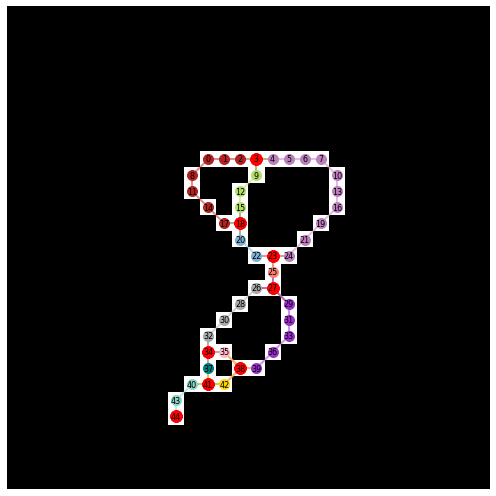

In [15]:
plot_graph_paths(result_dict_8, "")


### Chinese MNIST

In [16]:
# I downloaded the csv version of the dataset here: https://www.kaggle.com/datasets/fedesoriano/chinese-mnist-digit-recognizer
# remember to unzip and rename the file!
cmnist_filename = '../data/mnist/chinese_mnist.csv'
cmnist_images, cmnist_labels, _ = read_in_chinese_mnist(cmnist_filename)
#threshold_mean does not work well here
cmnist_binaries = [threshold_otsu(image) < image for image in cmnist_images]
cmnist_skeletons = [create_skeleton(binary) for binary in cmnist_binaries]

print(len(cmnist_images))
print(len(cmnist_labels))


15000
15000


In [17]:
print(np.unique(cmnist_labels))


['一' '七' '万' '三' '九' '二' '五' '亿' '八' '六' '十' '千' '四' '百' '零']


In [18]:
# pick the first instance of where the characters for 0 and 4 occur
idx_0 = list(np.where(np.array(cmnist_labels) == '零')[0])[0]
idx_4 = list(np.where(np.array(cmnist_labels) == '四')[0])[0]

label_0 = 0
label_4 = 4

img_0 = cmnist_images[idx_0]
img_4 = cmnist_images[idx_4]


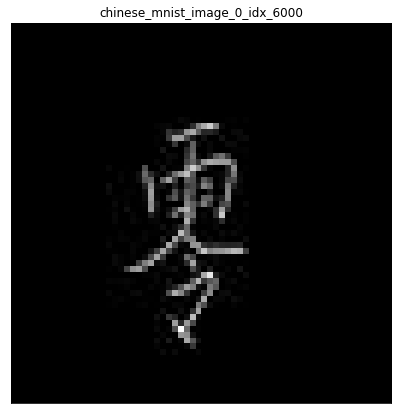

In [19]:
fig, ax = plt.subplots(1, figsize=(7, 7))

ax.imshow(img_0, cmap="gray")

ax.set_xticks([])
ax.set_yticks([]) 
ax.set_title("chinese_mnist_image_{}_idx_{}".format(label_0, idx_0))

plt.show()


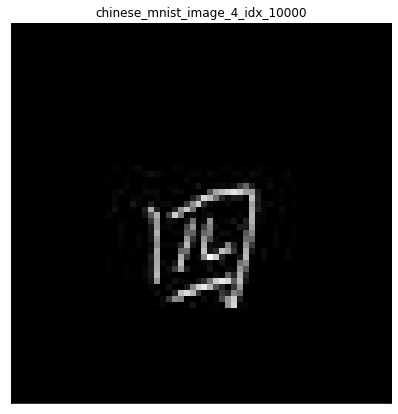

In [20]:
fig, ax = plt.subplots(1, figsize=(7, 7))

ax.imshow(img_4, cmap="gray")

ax.set_xticks([])
ax.set_yticks([]) 
ax.set_title("chinese_mnist_image_{}_idx_{}".format(label_4, idx_4))

plt.show()


In [21]:
binary_0 = cmnist_binaries[idx_0]
binary_4 = cmnist_binaries[idx_4]

skeleton_0 = cmnist_skeletons[idx_0]
skeleton_4 = cmnist_skeletons[idx_4]


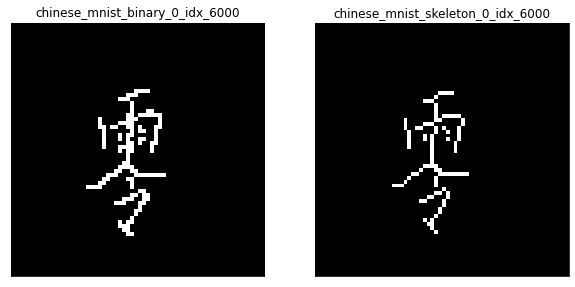

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))

ax[0].imshow(binary_0, cmap="gray")
ax[1].imshow(skeleton_0, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
    
ax[0].set_title("chinese_mnist_binary_{}_idx_{}".format(label_0, idx_0))
ax[1].set_title("chinese_mnist_skeleton_{}_idx_{}".format(label_0, idx_0))

plt.show()


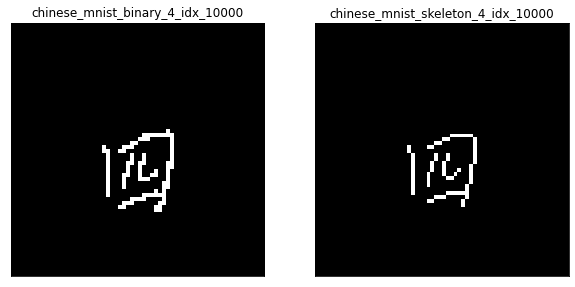

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

ax[0].imshow(binary_4, cmap="gray")
ax[1].imshow(skeleton_4, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
    
ax[0].set_title("chinese_mnist_binary_{}_idx_{}".format(label_4, idx_4))
ax[1].set_title("chinese_mnist_skeleton_{}_idx_{}".format(label_4, idx_4))

plt.show()


In [28]:
result_dict_0 = TGGLinesPlus(skeleton_0)
print_stats(result_dict_0)


Number of junctions:                       6
Number of path segmentation endpoints:     22
Number of nodes in graph:                  101
Path seg endpoints as total node percent:  0.218
------------------------------------------
Number of pixels in image skeleton:        101
Number of pixels in image:                 4356
Skeleton pixels as total image percent:    0.023
------------------------------------------
Time to run:                               0.01824s



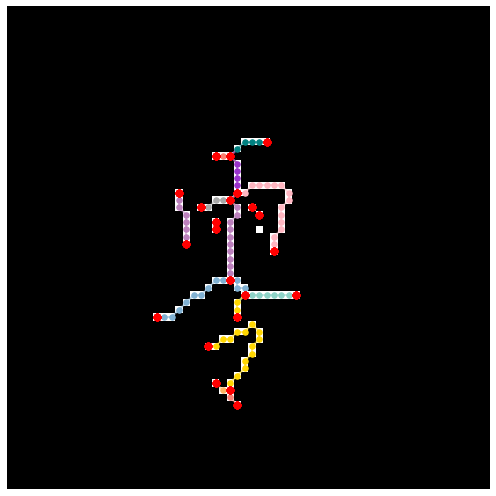

In [29]:
label = str(label_0) + "_" + str(idx_0)
plot_graph_paths(result_dict_0, label, node_size=30, node_labels=False)


In [30]:
result_dict_4 = TGGLinesPlus(skeleton_4)
print_stats(result_dict_4)


Number of junctions:                       1
Number of path segmentation endpoints:     10
Number of nodes in graph:                  72
Path seg endpoints as total node percent:  0.139
------------------------------------------
Number of pixels in image skeleton:        72
Number of pixels in image:                 4356
Skeleton pixels as total image percent:    0.017
------------------------------------------
Time to run:                               0.01034s



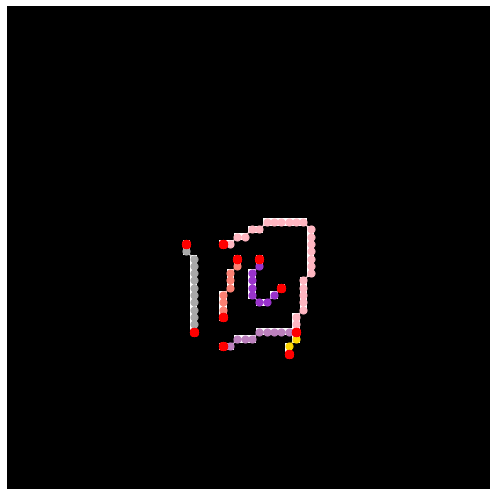

In [31]:
label = str(label_4) + "_" + str(idx_4)
plot_graph_paths(result_dict_4, label, node_size=50, node_labels=False)


### Documents

In [32]:
# https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_niblack_sauvola.html#sphx-glr-auto-examples-segmentation-plot-niblack-sauvola-py
img = skimage.data.page()

window_size = 25
thresh_page = threshold_sauvola(img, window_size=window_size)
binary_page = img < thresh_page
skeleton_page = create_skeleton(binary_page)


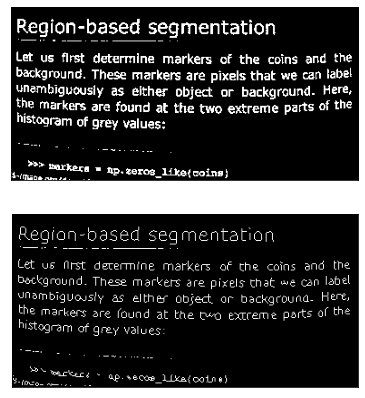

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(15, 7))

ax[0].imshow(binary_page, cmap="gray")
ax[1].imshow(skeleton_page, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])

plt.show()


In [34]:
skeleton_array_page, coordinates_page = create_skeleton_graph(skeleton_page, connectivity=2)
skeleton_graph_page = nx.from_scipy_sparse_array(skeleton_array_page)
search_by_node_page, search_by_location_page = get_node_locations(coordinates_page)


In [35]:
result_dict_page = TGGLinesPlus(skeleton_page)
print_stats(result_dict_page)


Number of junctions:                       253
Number of path segmentation endpoints:     728
Number of nodes in graph:                  4348
Path seg endpoints as total node percent:  0.167
------------------------------------------
Number of pixels in image skeleton:        4348
Number of pixels in image:                 74498
Skeleton pixels as total image percent:    0.058
------------------------------------------
Time to run:                               45.21411s



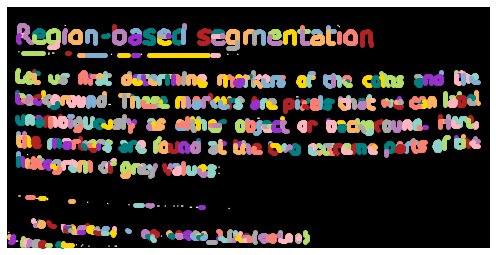

In [36]:
plot_graph_paths(result_dict_page, "page", node_size=15, endpoints=False, node_labels=False)


## Health


In [37]:
#https://scikit-image.org/docs/stable/auto_examples/applications/plot_pixel_graphs.html#sphx-glr-auto-examples-applications-plot-pixel-graphs-py
img = skimage.data.retina()
retina = color.rgb2gray(img)
t0, t1 = skimage.filters.threshold_multiotsu(retina, classes=3)
mask = (retina > t0)
vessels = skimage.filters.sato(retina, sigmas=range(1, 10)) * mask


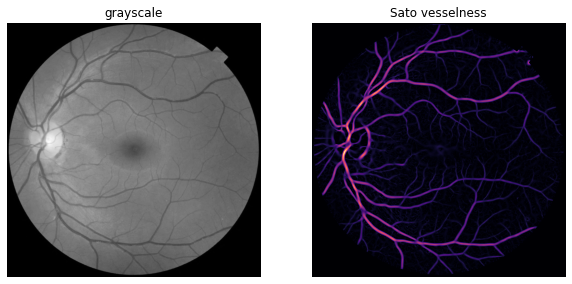

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

ax[0].imshow(retina, cmap='gray')
ax[1].imshow(vessels, cmap='magma')

ax[0].set_axis_off()
ax[1].set_axis_off()

ax[0].set_title('grayscale')
ax[1].set_title('Sato vesselness')

plt.show()


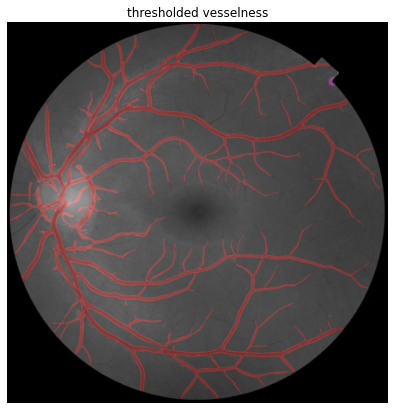

In [39]:
thresholded = skimage.filters.apply_hysteresis_threshold(vessels, 0.01, 0.03)
labeled = ndi.label(thresholded)[0]

fig, ax = plt.subplots(figsize=(7, 7))

ax.imshow(color.label2rgb(labeled, retina))

ax.set_axis_off()
ax.set_title('thresholded vesselness')

plt.show()


In [40]:
largest_nonzero_label = np.argmax(np.bincount(labeled[labeled > 0]))
binary_retina = labeled == largest_nonzero_label
skeleton_retina = skeletonize(binary_retina)


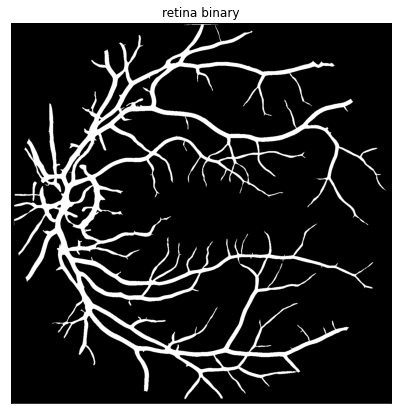

In [41]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.imshow(binary_retina, cmap="gray")

ax.set_xticks([])
ax.set_yticks([])
ax.set_title("retina binary")

plt.show()


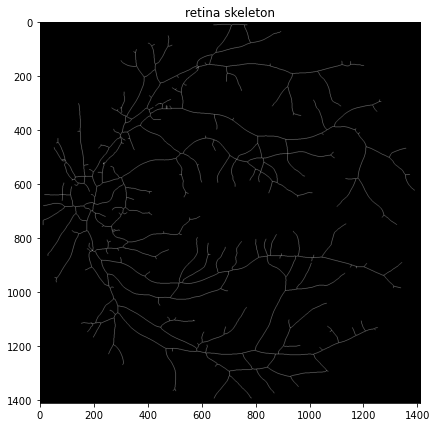

In [42]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.imshow(skeleton_retina, cmap="gray")

axis.set_xticks([])
axis.set_yticks([])
ax.set_title("retina skeleton")

plt.show()

It is hard to see, but the skeleton is there.

In [43]:
skeleton_array_retina, coordinates_retina = create_skeleton_graph(skeleton_retina, connectivity=2)
skeleton_graph_retina = nx.from_scipy_sparse_array(skeleton_array_retina)
search_by_node_retina, search_by_location_retina = get_node_locations(coordinates_retina)


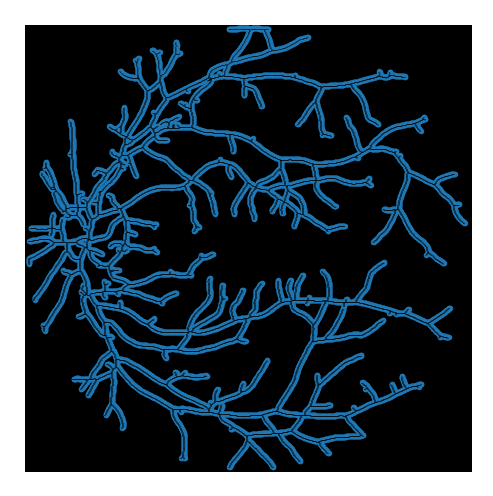

In [44]:
plot_graph(skeleton_retina, skeleton_graph_retina, coordinates_retina, search_by_node_retina, node_size=20, label_size=0)


In [45]:
result_dict_retina = TGGLinesPlus(skeleton_retina)
print_stats(result_dict_retina)


Number of junctions:                       270
Number of path segmentation endpoints:     455
Number of nodes in graph:                  20249
Path seg endpoints as total node percent:  0.022
------------------------------------------
Number of pixels in image skeleton:        20249
Number of pixels in image:                 1990921
Skeleton pixels as total image percent:    0.01
------------------------------------------
Time to run:                               25.13297s



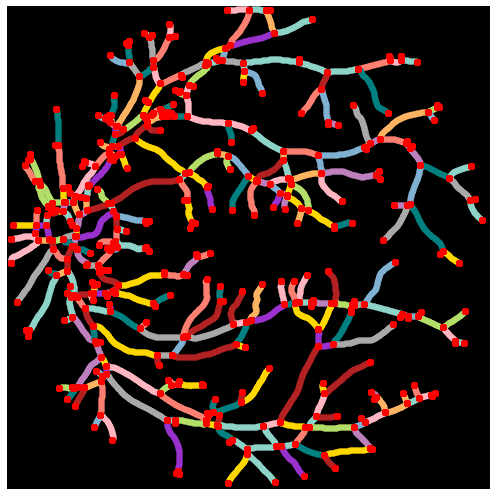

In [46]:
plot_graph_paths(result_dict_retina, "retina", node_size=20, node_labels=False)


Let's choose a smaller portion of the image to focus on.

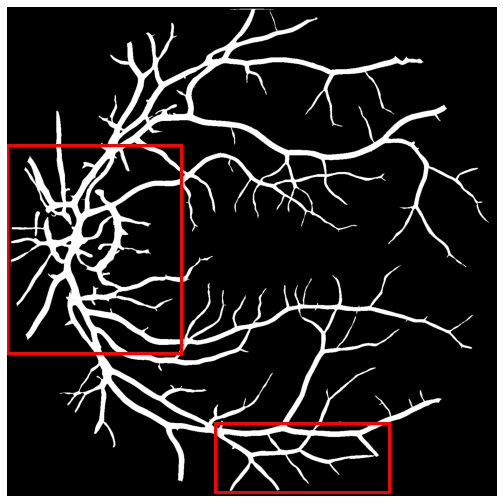

In [47]:
patch_options = {
    "linewidth": 3,
    "edgecolor": "r",
    "facecolor": "none",
}

fig, ax = plt.subplots(figsize=(9, 9))

ax.imshow(binary_retina, cmap="gray")

# https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html
# add rectangles around areas of interest in the image
middle_patch = patches.Rectangle((0, 400), 500, 600, **patch_options)
bottom_patch = patches.Rectangle((600, 1200), 500, 200, **patch_options)

ax.add_patch(middle_patch)
ax.add_patch(bottom_patch)

plt.axis("off")
plt.show()


We can start with the left-middle patch.

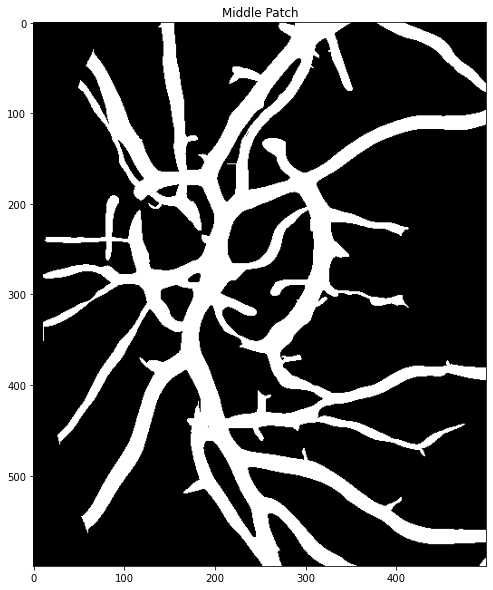

In [48]:
binary_retina_small = binary_retina[400:1000, 0:500] # [600, 500]

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(binary_retina_small, cmap="gray")

ax.set_title("Middle Patch")

plt.show()


In [49]:
skeleton_retina_small = skeleton_retina[400:1000, 0:500]

skeleton_array_retina, coordinates_retina = create_skeleton_graph(skeleton_retina_small, connectivity=2)
skeleton_graph_retina = nx.from_scipy_sparse_array(skeleton_array_retina)
search_by_node_retina, search_by_location_retina = get_node_locations(coordinates_retina)


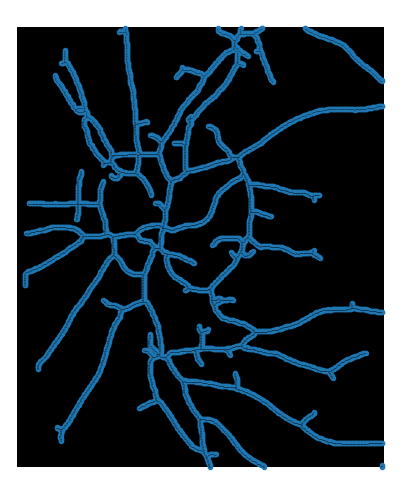

In [50]:
plot_graph(skeleton_retina_small, skeleton_graph_retina, coordinates_retina, search_by_node_retina, node_size=20, label_size=0)


In [51]:
result_dict_retina_small = TGGLinesPlus(skeleton_retina_small)
print_stats(result_dict_retina_small)


Number of junctions:                       93
Number of path segmentation endpoints:     158
Number of nodes in graph:                  5248
Path seg endpoints as total node percent:  0.03
------------------------------------------
Number of pixels in image skeleton:        5248
Number of pixels in image:                 300000
Skeleton pixels as total image percent:    0.017
------------------------------------------
Time to run:                               2.49863s



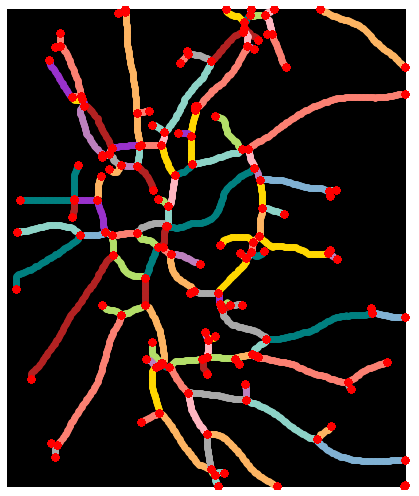

In [52]:
plot_graph_paths(result_dict_retina_small, "retina", node_size=30, node_labels=False)


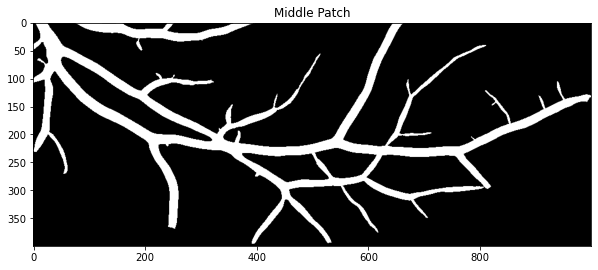

In [53]:
binary_retina_small = binary_retina[1000:1400, 250:1250] # [400, 1000]

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(binary_retina_small, cmap="gray")

ax.set_title("Middle Patch")

plt.show()


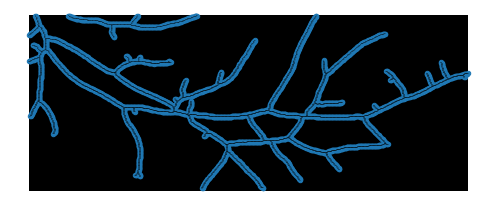

In [54]:
skeleton_retina_small = skeleton_retina[1000:1400, 250:1250]

skeleton_array_retina, coordinates_retina = create_skeleton_graph(skeleton_retina_small, connectivity=2)
skeleton_graph_retina = nx.from_scipy_sparse_array(skeleton_array_retina)
search_by_node_retina, search_by_location_retina = get_node_locations(coordinates_retina)

plot_graph(skeleton_retina_small, skeleton_graph_retina, coordinates_retina, search_by_node_retina, node_size=20, label_size=0)


In [56]:
result_dict_retina_small = TGGLinesPlus(skeleton_retina_small)
print_stats(result_dict_retina_small)


Number of junctions:                       43
Number of path segmentation endpoints:     82
Number of nodes in graph:                  4298
Path seg endpoints as total node percent:  0.019
------------------------------------------
Number of pixels in image skeleton:        4298
Number of pixels in image:                 400000
Skeleton pixels as total image percent:    0.011
------------------------------------------
Time to run:                               1.09541s



## Massachusetts roads

In [57]:
road_name = '11278840_15.tif'
road_path = '../data/mass_roads/' + road_name
road_array = open_tiff(road_path)
road_array


/Users/joshuadriscoll/miniconda3/envs/skeleton_graph/lib/python3.9/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [58]:
road_array.shape


(1500, 1500)

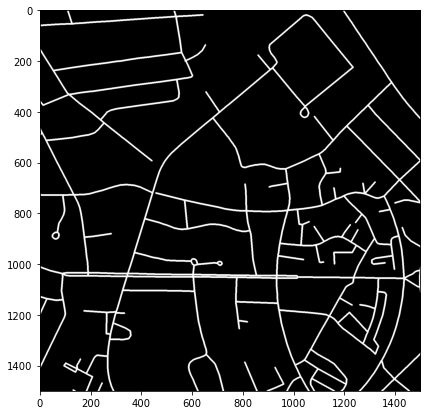

In [59]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.imshow(road_array, cmap="gray")

plt.show()


In [60]:
binary_road = create_binary(road_array)
skeleton_road = create_skeleton(binary_road)

skeleton_array_road, coordinates_road = create_skeleton_graph(skeleton_road, connectivity=2)
skeleton_graph_road = nx.from_scipy_sparse_array(skeleton_array_road)
search_by_node_road, search_by_location_road = get_node_locations(coordinates_road)


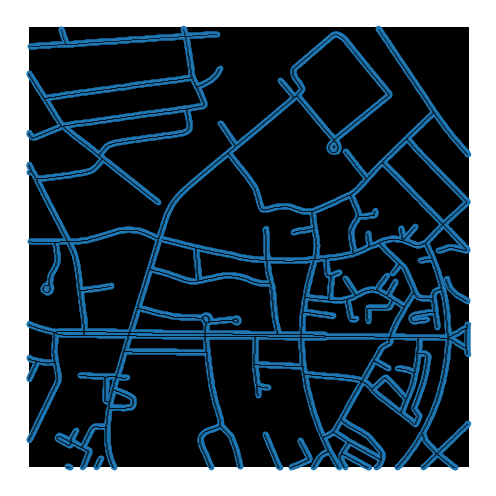

In [61]:
plot_graph(skeleton_road, skeleton_graph_road, coordinates_road, search_by_node_road, node_size=20, label_size=0)


In [62]:
result_dict_roads = TGGLinesPlus(skeleton_road)
print_stats(result_dict_roads)


Number of junctions:                       140
Number of path segmentation endpoints:     214
Number of nodes in graph:                  23193
Path seg endpoints as total node percent:  0.009
------------------------------------------
Number of pixels in image skeleton:        23193
Number of pixels in image:                 2256004
Skeleton pixels as total image percent:    0.01
------------------------------------------
Time to run:                               12.98426s



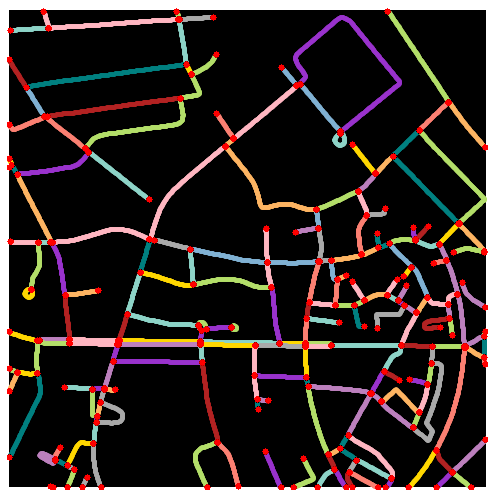

In [63]:
plot_graph_paths(result_dict_roads, "roads", node_size=10, node_labels=False)


Let's choose a smaller portion of the image to focus on.

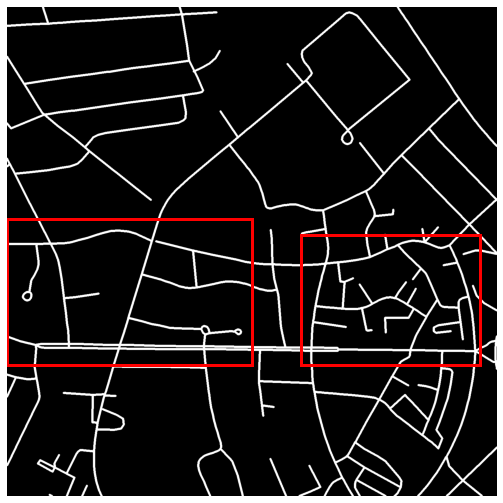

In [64]:
patch_options = {
    "linewidth": 3,
    "edgecolor": "r",
    "facecolor": "none",
}

fig, ax = plt.subplots(figsize=(9, 9))

ax.imshow(road_array, cmap="gray")

# https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html
# add rectangles around areas of interest in the image
middle_patch = patches.Rectangle((0, 650), 750, 450, **patch_options)
bottom_patch = patches.Rectangle((900, 700), 550, 400, **patch_options)

ax.add_patch(middle_patch)
ax.add_patch(bottom_patch)

plt.axis("off")
plt.show()


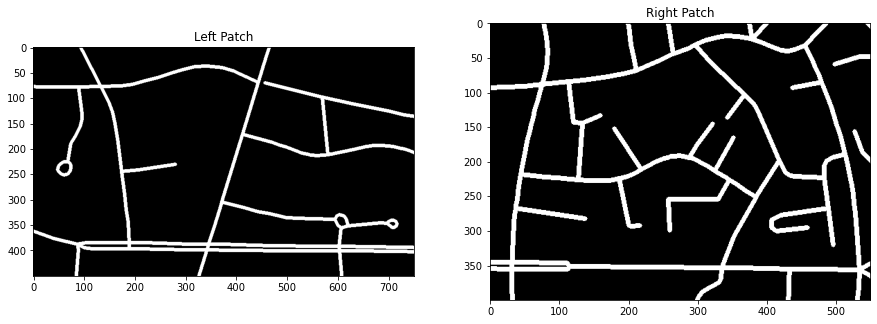

In [65]:
road_left = road_array[650:1100, 0:750] # [450, 750]
road_right = road_array[700:1100, 900:1450] # [400, 550]


fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(road_left, cmap="gray")
ax[1].imshow(road_right, cmap="gray")

ax[0].set_title("Left Patch")
ax[1].set_title("Right Patch")

# ax[0].axis("off")
# ax[1].axis("off")

plt.show()


In [66]:
binary_road_left = create_binary(road_left)
skeleton_road_left = create_skeleton(binary_road_left)

binary_road_right = create_binary(road_right)
skeleton_road_right = create_skeleton(binary_road_right)


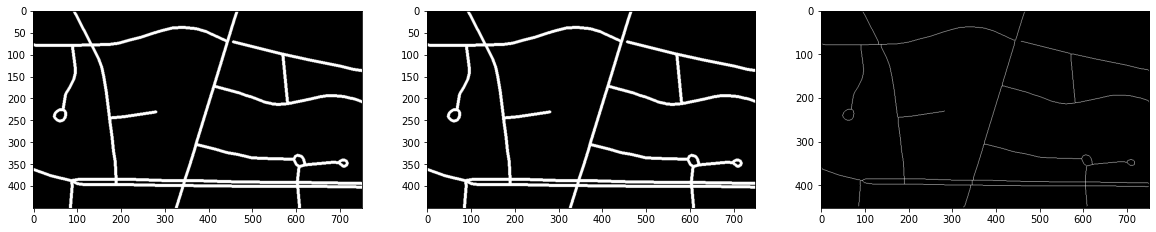

In [67]:
fig, ax = plt.subplots(1, 3, figsize=(20, 15))

ax[0].imshow(road_left, cmap="gray")
ax[1].imshow(binary_road_left, cmap="gray")
ax[2].imshow(skeleton_road_left, cmap="gray")

plt.show()


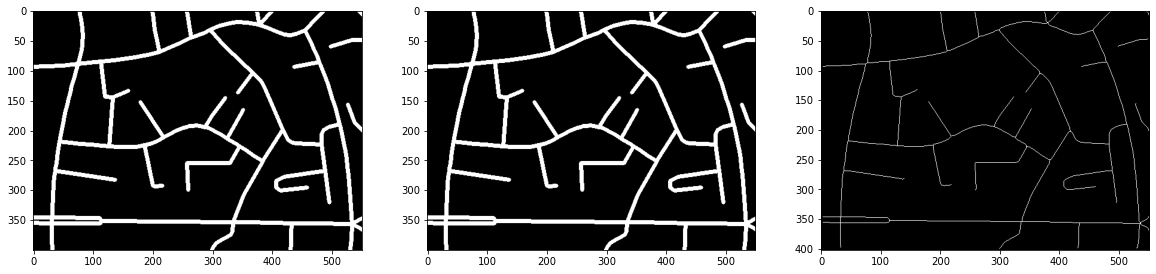

In [68]:
fig, ax = plt.subplots(1, 3, figsize=(20, 15))

ax[0].imshow(road_right, cmap="gray")
ax[1].imshow(binary_road_right, cmap="gray")
ax[2].imshow(skeleton_road_right, cmap="gray")

plt.show()


In [69]:
road_array_left, coordinates_road = create_skeleton_graph(skeleton_road_left, connectivity=2)
graph_road_left = nx.from_scipy_sparse_array(road_array_left)
search_by_node_road, search_by_location_road = get_node_locations(coordinates_road)


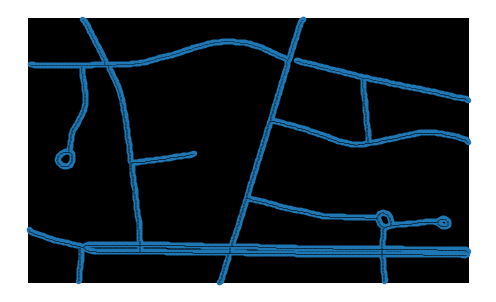

In [70]:
plot_graph(skeleton_road_left, graph_road_left, coordinates_road, search_by_node_road, node_size=20, label_size=0)


In [71]:
result_dict_road_left = TGGLinesPlus(skeleton_road_left)
print_stats(result_dict_road_left)


Number of junctions:                       24
Number of path segmentation endpoints:     37
Number of nodes in graph:                  4320
Path seg endpoints as total node percent:  0.009
------------------------------------------
Number of pixels in image skeleton:        4320
Number of pixels in image:                 339904
Skeleton pixels as total image percent:    0.013
------------------------------------------
Time to run:                               0.61187s



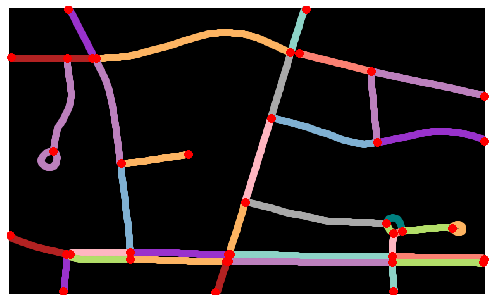

In [72]:
plot_graph_paths(result_dict_road_left, "road", node_size=30, node_labels=False)


In [73]:
road_array_right, coordinates_road = create_skeleton_graph(skeleton_road_right, connectivity=2)
graph_road_right = nx.from_scipy_sparse_array(road_array_right)
search_by_node_road, search_by_location_road = get_node_locations(coordinates_road)


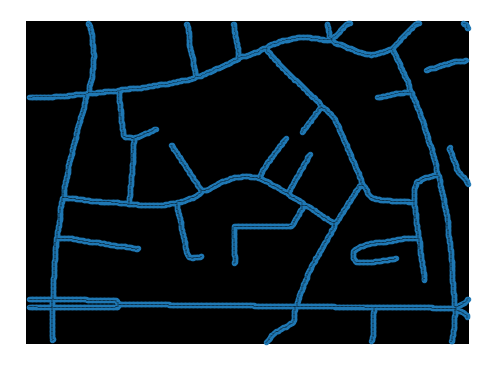

In [74]:
plot_graph(skeleton_road_right, graph_road_right, coordinates_road, search_by_node_road, node_size=20, label_size=0)


In [75]:
result_dict_road_right = TGGLinesPlus(skeleton_road_right)
print_stats(result_dict_road_right)


Number of junctions:                       39
Number of path segmentation endpoints:     71
Number of nodes in graph:                  4053
Path seg endpoints as total node percent:  0.018
------------------------------------------
Number of pixels in image skeleton:        4053
Number of pixels in image:                 221904
Skeleton pixels as total image percent:    0.018
------------------------------------------
Time to run:                               0.85980s



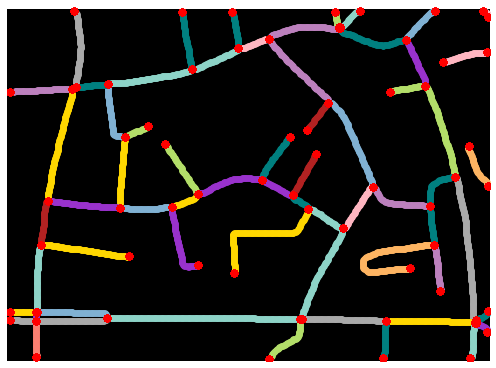

In [76]:
plot_graph_paths(result_dict_road_right, "road", node_size=30, node_labels=False)


## DeepCrack

In [77]:
cement_name = '../data/deepcrack/11215-5.png'
image_cement = np.asarray(Image.open(cement_name).convert("L"))
print(image_cement.shape)


(384, 544)


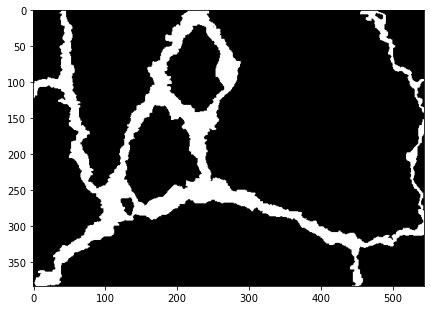

In [78]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.imshow(image_cement, cmap="gray")

plt.show()


In [79]:
binary_cement = create_binary(image_cement)
skeleton_cement = create_skeleton(binary_cement)

skeleton_array_cement, coordinates_cement = create_skeleton_graph(skeleton_cement, connectivity=2)
skeleton_graph_cement = nx.from_scipy_sparse_array(skeleton_array_cement)
search_by_node_cement, search_by_location_cement = get_node_locations(coordinates_cement)


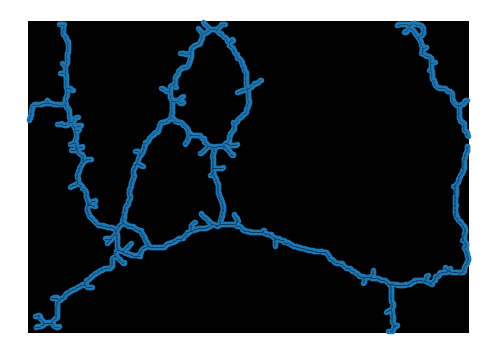

In [80]:
plot_graph(skeleton_cement, skeleton_graph_cement, coordinates_cement, search_by_node_cement, node_size=20, label_size=0)


In [81]:
result_dict_cement = TGGLinesPlus(skeleton_cement)
print_stats(result_dict_cement)


Number of junctions:                       80
Number of path segmentation endpoints:     156
Number of nodes in graph:                  2536
Path seg endpoints as total node percent:  0.062
------------------------------------------
Number of pixels in image skeleton:        2536
Number of pixels in image:                 210756
Skeleton pixels as total image percent:    0.012
------------------------------------------
Time to run:                               1.30603s



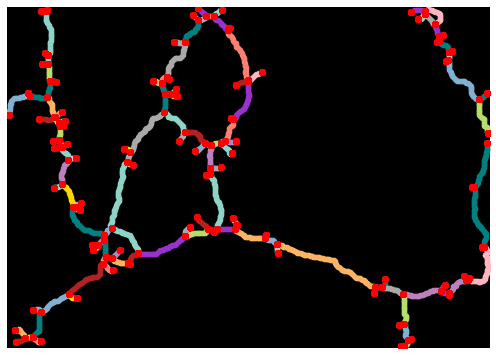

In [82]:
plot_graph_paths(result_dict_cement, "cement", node_size=20, node_labels=False)


## Satellite imagery
### Ice sheet imagery Landsat

In [83]:
landsat_location_1 = '../data/rs_imagery/test_image1.png'
landsat_location_2 = '../data/rs_imagery/test_image2.png'
landsat_location_3 = '../data/rs_imagery/test_image3.png'

# these images have RGBA channels, convert them to grayscale
landsat_array_1 = np.asarray(Image.open(landsat_location_1).convert("L"))
landsat_array_2 = np.asarray(Image.open(landsat_location_2).convert("L"))
landsat_array_3 = np.asarray(Image.open(landsat_location_3).convert("L"))


In [84]:
print(landsat_array_1.shape)
print(landsat_array_2.shape)
print(landsat_array_3.shape)


(177, 191)
(277, 266)
(520, 416)


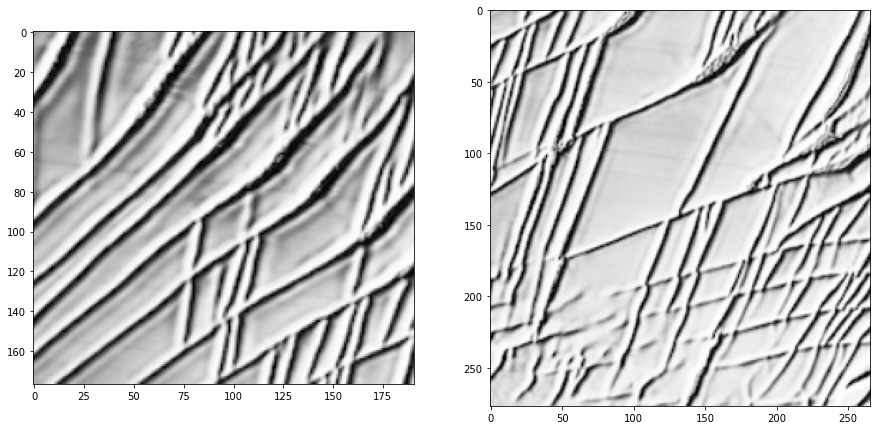

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(landsat_array_1, cmap="gray")
ax[1].imshow(landsat_array_2, cmap="gray")

plt.show()


Let's start with the image on the left, simply because it is smaller.

In [86]:
binary_landsat = create_binary_reverse(landsat_array_1)
skeleton_landsat = create_skeleton(binary_landsat)


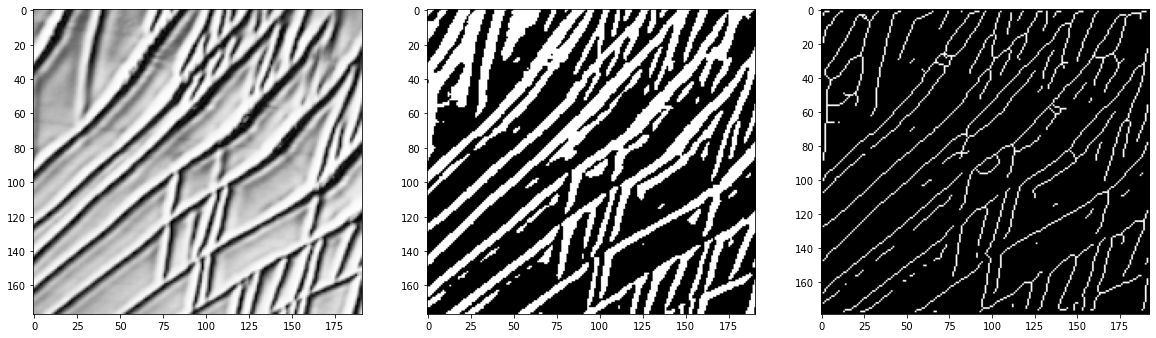

In [87]:
fig, ax = plt.subplots(1, 3, figsize=(20, 15))

ax[0].imshow(landsat_array_1, cmap="gray")
ax[1].imshow(binary_landsat, cmap="gray")
ax[2].imshow(skeleton_landsat, cmap="gray")

plt.show()


In [88]:
skeleton_array_landsat, coordinates_landsat = create_skeleton_graph(skeleton_landsat, connectivity=2)
skeleton_graph_landsat = nx.from_scipy_sparse_array(skeleton_array_landsat)
search_by_node_landsat, search_by_location_landsat = get_node_locations(coordinates_landsat)


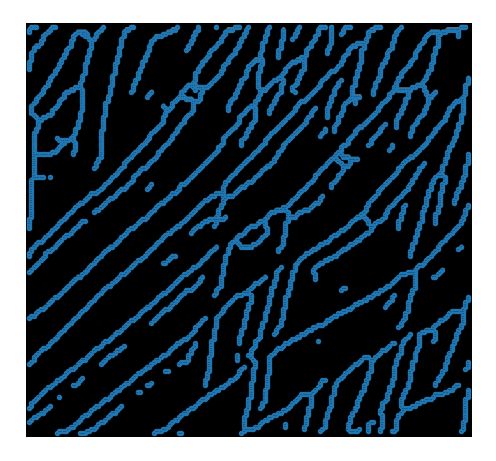

In [89]:
plot_graph(skeleton_landsat, skeleton_graph_landsat, coordinates_landsat, search_by_node_landsat, node_size=20, label_size=0)


In [90]:
result_dict_landsat = TGGLinesPlus(skeleton_landsat)
print_stats(result_dict_landsat)


Number of junctions:                       52
Number of path segmentation endpoints:     198
Number of nodes in graph:                  2742
Path seg endpoints as total node percent:  0.072
------------------------------------------
Number of pixels in image skeleton:        2742
Number of pixels in image:                 34547
Skeleton pixels as total image percent:    0.079
------------------------------------------
Time to run:                               1.88981s



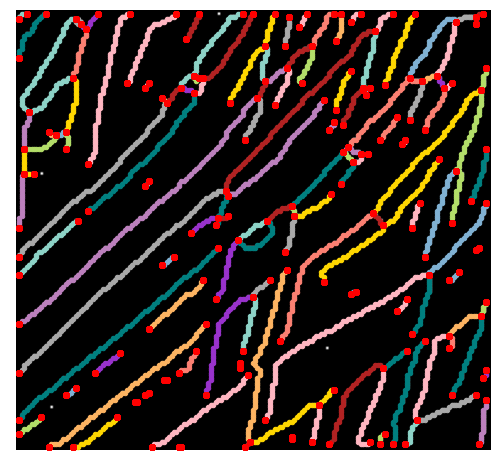

In [91]:
plot_graph_paths(result_dict_landsat, "landsat_example_1", node_size=20, node_labels=False)


And now the second image?

In [92]:
binary_landsat = create_binary_reverse(landsat_array_2)
skeleton_landsat = create_skeleton(binary_landsat)


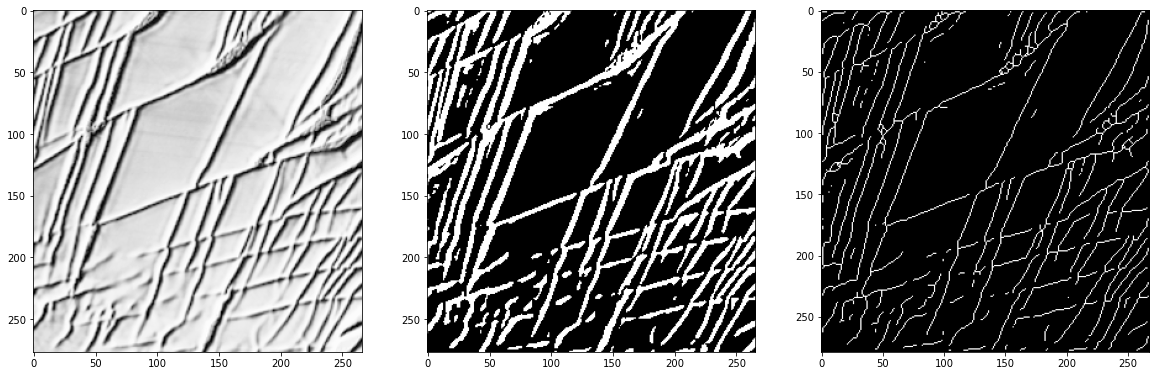

In [93]:
fig, ax = plt.subplots(1, 3, figsize=(20, 15))

ax[0].imshow(landsat_array_2, cmap="gray")
ax[1].imshow(binary_landsat, cmap="gray")
ax[2].imshow(skeleton_landsat, cmap="gray")

plt.show()

In [94]:
skeleton_array_landsat, coordinates_landsat = create_skeleton_graph(skeleton_landsat, connectivity=2)
skeleton_graph_landsat = nx.from_scipy_sparse_array(skeleton_array_landsat)
search_by_node_landsat, search_by_location_landsat = get_node_locations(coordinates_landsat)


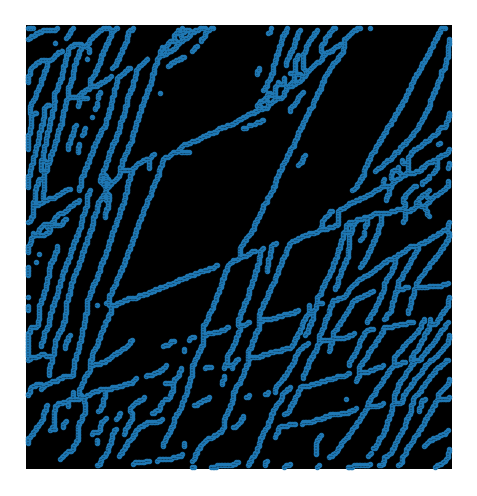

In [95]:
plot_graph(skeleton_landsat, skeleton_graph_landsat, coordinates_landsat, search_by_node_landsat, node_size=20, label_size=0)


In [96]:
result_dict_landsat = TGGLinesPlus(skeleton_landsat)
print_stats(result_dict_landsat)


Number of junctions:                       131
Number of path segmentation endpoints:     384
Number of nodes in graph:                  5010
Path seg endpoints as total node percent:  0.077
------------------------------------------
Number of pixels in image skeleton:        5010
Number of pixels in image:                 74772
Skeleton pixels as total image percent:    0.067
------------------------------------------
Time to run:                               7.04711s



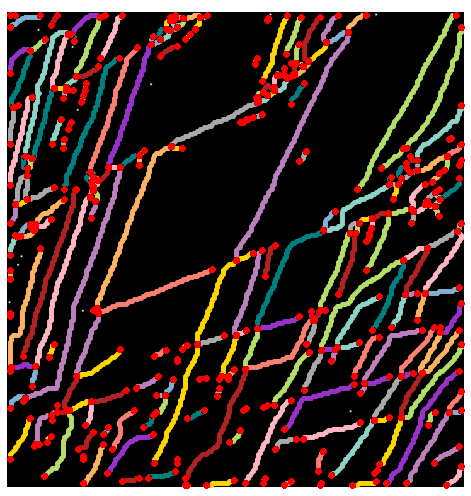

In [97]:
plot_graph_paths(result_dict_landsat, "landsat_example_2", node_size=15, node_labels=False)


## Map contours


In [98]:
contours_name = '../data/abq_contours_50ft.png'
image_contours = np.asarray(Image.open(contours_name).convert("L"))
print(image_contours.shape)


(1126, 1458)


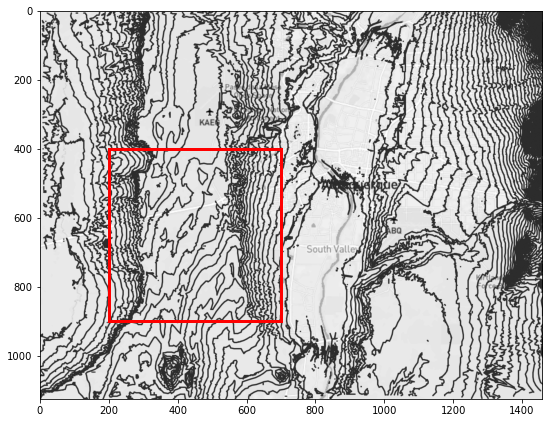

In [99]:
patch_options = {
    "linewidth": 3,
    "edgecolor": "r",
    "facecolor": "none",
}

fig, ax = plt.subplots(figsize=(9, 9))

ax.imshow(image_contours, cmap="gray")

# https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html
# add rectangles around areas of interest in the image
middle_patch = patches.Rectangle((200, 400), 500, 500, **patch_options)
ax.add_patch(middle_patch)

plt.show()


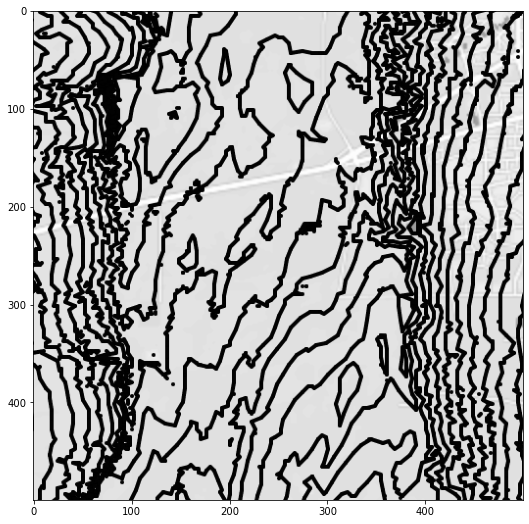

In [100]:
image_contours_small = image_contours[400:900, 200:700]

fig, ax = plt.subplots(figsize=(9, 9))

ax.imshow(image_contours_small, cmap="gray")

plt.show()


In [101]:
binary_contours = create_binary_reverse(image_contours_small)
skeleton_contours = create_skeleton(binary_contours)


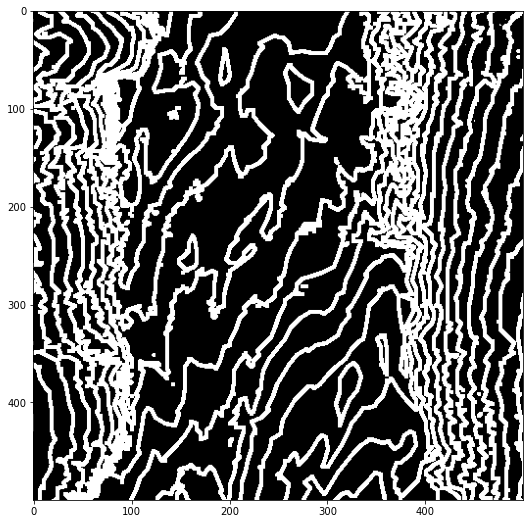

In [102]:
fig, ax = plt.subplots(figsize=(9, 9))

ax.imshow(binary_contours, cmap="gray")

plt.show()


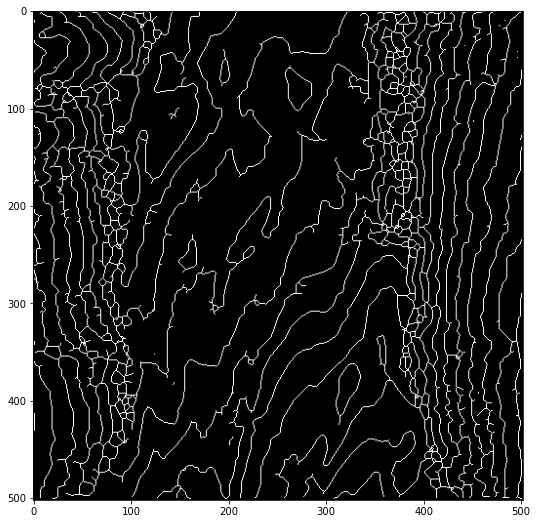

In [103]:
fig, ax = plt.subplots(figsize=(9, 9))

ax.imshow(skeleton_contours, cmap="gray")

plt.show()


In [104]:
skeleton_array_contours, coordinates_contours = create_skeleton_graph(skeleton_contours, connectivity=2)
skeleton_graph_contours = nx.from_scipy_sparse_array(skeleton_array_contours)
search_by_node_contours, search_by_location_contours = get_node_locations(coordinates_contours)


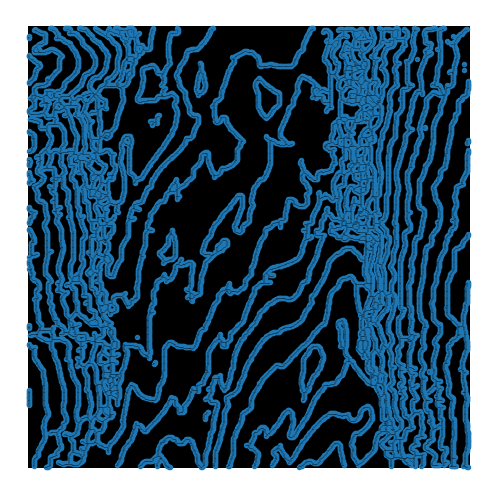

In [105]:
plot_graph(skeleton_contours, skeleton_graph_contours, coordinates_contours, search_by_node_contours, node_size=20, label_size=0)


In [106]:
result_dict_contours = TGGLinesPlus(skeleton_contours)
print_stats(result_dict_contours)


Number of junctions:                       920
Number of path segmentation endpoints:     1203
Number of nodes in graph:                  17315
Path seg endpoints as total node percent:  0.069
------------------------------------------
Number of pixels in image skeleton:        17315
Number of pixels in image:                 252004
Skeleton pixels as total image percent:    0.069
------------------------------------------
Time to run:                               142.29663s



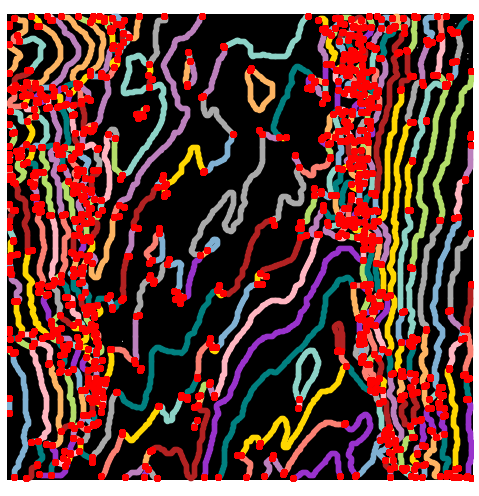

In [107]:
plot_graph_paths(result_dict_contours, "contours", node_size=20, node_labels=False)